<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Assignment-3/SEMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Welcome to this comprehensive tutorial on Exploratory Data Analysis (EDA) and predictive modeling using SEMMA Methodology in Data Science. This will guide you through a hands-on, step-by-step approach to tackle a Kaggle dataset featuring information about the world's largest companies.

**SEMMA Methodology Overview:**

SEMMA stands for Sample, Explore, Modify, Model, and Assess. It is a methodology that provides a structured framework for conducting a data science project. Here's a quick rundown:

- **Sample**: Select a subset of data to perform initial investigations.
- **Explore**: Examine the data to understand its structure, variables, and quality.
- **Modify**: Clean and preprocess the data to prepare it for modeling.
- **Model**: Apply various machine learning models to the prepared data.
- **Assess**: Evaluate the performance of the models using appropriate metrics.


### Step 1: Sample - Initial Data Understanding

Let's start by loading the dataset and taking a look at the first few rows to get an initial understanding of the data.

#### What Will We Do Next?

After loading the data, we'll proceed with some basic statistics and visualizations to understand the dataset's structure, features, and potential challenges.

Let's load the data.



In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/100_large_companies/Largest_Companies.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


### Initial Observations

The dataset contains information about the world's largest companies, featuring the following columns:

1. **Rank**: The ranking of the company.
2. **Name**: The name of the company.
3. **Industry**: The industry to which the company belongs.
4. **Revenue (USD millions)**: The revenue of the company in USD millions.
5. **Revenue growth**: The growth in revenue, expressed as a percentage.
6. **Employees**: The number of employees in the company.
7. **Headquarters**: The location of the company's headquarters.

### Data Types and Formats

Upon initial inspection, we can see that some columns that should be numerical (like "Revenue (USD millions)", "Revenue growth", and "Employees") are not in a numerical format. This is due to the presence of commas, percentage signs, and other non-numeric characters.

#### What Will We Do Next?

The next step, according to the SEMMA methodology, is the **Explore** phase. In this phase, we will:
- Generate summary statistics for the numerical and categorical variables.
- Identify missing values.
- Visualize the data to better understand its distribution and relationships between variables.

To summarize, we are now transitioning from the **Sample** phase to the **Explore** phase of the SEMMA methodology.

Step 2: Explore - Generate Summary Statistics
Before diving into more advanced analyses, it's crucial to generate summary statistics for both numerical and categorical variables. This will give us a snapshot of the data's central tendency, dispersion, and shape.

Let's start by converting the columns that should be numerical into the appropriate data types. After that, we'll generate some summary statistics.

What Will We Do Next?
After generating the summary statistics, we'll proceed to identify missing values and visualize the data to further understand its distribution and the relationships between variables.

Let's start by converting the columns to their appropriate numerical formats.

In [3]:
# Convert 'Revenue (USD millions)' to numerical format by removing commas and converting to float
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)

# Convert 'Revenue growth' to numerical format by removing the '%' sign and converting to float
df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype(float)

# Convert 'Employees' to numerical format by removing commas and converting to float
df['Employees'] = df['Employees'].str.replace(',', '').astype(float)

# Display the first few rows after conversion
df.head()


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289.0,6.7,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983.0,9.4,1540000.0,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680.0,44.8,62000.0,"Spring, Texas"
3,4,Apple,Electronics industry,394328.0,7.8,164000.0,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000.0,"Minnetonka, Minnesota"


Data Conversion Successful
We have successfully converted the columns "Revenue (USD millions)", "Revenue growth", and "Employees" to their appropriate numerical formats.

Next Step: Generate Summary Statistics
Now that we have cleaned the data types for these columns, let's generate summary statistics to get a better sense of the dataset's characteristics.

What Will We Do Next?
After generating the summary statistics, we'll move on to identifying missing values and visualizing the data to explore its distribution and relationships between variables.

Let's proceed to generate the summary statistics.

In [4]:
# Generate summary statistics for the numerical columns
numerical_summary = df.describe()

# Generate summary statistics for the categorical columns
categorical_summary = df.describe(include=['object'])

numerical_summary, categorical_summary


(             Rank  Revenue (USD millions)  Revenue growth     Employees
 count  100.000000              100.000000      100.000000  1.000000e+02
 mean    50.500000           117566.460000       19.576000  1.680301e+05
 std     29.011492           100915.112163       21.463397  2.717493e+05
 min      1.000000            44200.000000        0.500000  3.050000e+02
 25%     25.750000            57876.000000        4.375000  4.471150e+04
 50%     50.500000            80824.500000       11.700000  8.963850e+04
 75%     75.250000           138763.000000       23.625000  1.965125e+05
 max    100.000000           611289.000000       97.200000  2.100000e+06,
            Name    Industry             Headquarters
 count       100         100                      100
 unique      100          38                       76
 top     Walmart  Financials  New York City, New York
 freq          1          11                       12)

Summary Statistics
Numerical Variables:
Rank: Ranges from 1 to 100, as expected. The mean and median are around 50, which is expected for a ranking variable.
Revenue (USD millions): The revenue ranges from 44,200 to 611,289 million USD. The mean is around 117,566 million USD, and the median is 80,825 million USD.
Revenue growth: The growth in revenue varies from 0.5% to 97.2%. The mean is approximately 19.6%, and the median is 11.7%.
Employees: The number of employees ranges from 305 to 2,100,000. The mean is around 168,030, and the median is 89,639.
Categorical Variables:
Name: All 100 companies have unique names.
Industry: There are 38 unique industries represented. The most frequent industry is "Financials."
Headquarters: There are 76 unique locations for company headquarters. The most frequent location is "New York City, New York."
What Will We Do Next?
The next step in the Explore phase is to identify any missing values in the dataset. After that, we will visualize the data to understand its distribution and relationships between variables better.

To summarize, we are currently in the Explore phase of the SEMMA methodology, focusing on identifying missing values.

Step 2: Explore - Identify Missing Values
Missing values can introduce bias or lead to incorrect conclusions. Therefore, it's crucial to identify and address them early in the data analysis process.

What Will We Do Next?
After identifying any missing values, we'll move on to visualizing the data to get a better understanding of its distribution and the relationships between variables.

Let's proceed to check for missing values.

In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values


Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

No Missing Values
Great news! Our dataset does not contain any missing values for any of the columns. This simplifies the data cleaning process and allows us to move on to the next steps without the need for imputation or other methods to handle missing data.

What Will We Do Next?
The next step in the Explore phase is to visualize the data. This will help us better understand the distribution of individual variables and the relationships between them.

To summarize, we are currently in the Explore phase of the SEMMA methodology, transitioning from identifying missing values to data visualization.

##Step 2: Explore - Data Visualization
Data visualization is a powerful tool for understanding the distribution of data and the relationships between variables. Given our limited computational resources, we will start with some essential visualizations:

Histograms for numerical variables to understand their distribution.
Box plots to identify outliers.
A correlation matrix to understand the relationships between numerical variables.
What Will We Do Next?
After visualizing the data, we will transition into the Modify phase of the SEMMA methodology, where we will perform data cleaning, preprocessing, and feature selection.

Let's start with the histograms for the numerical variables.

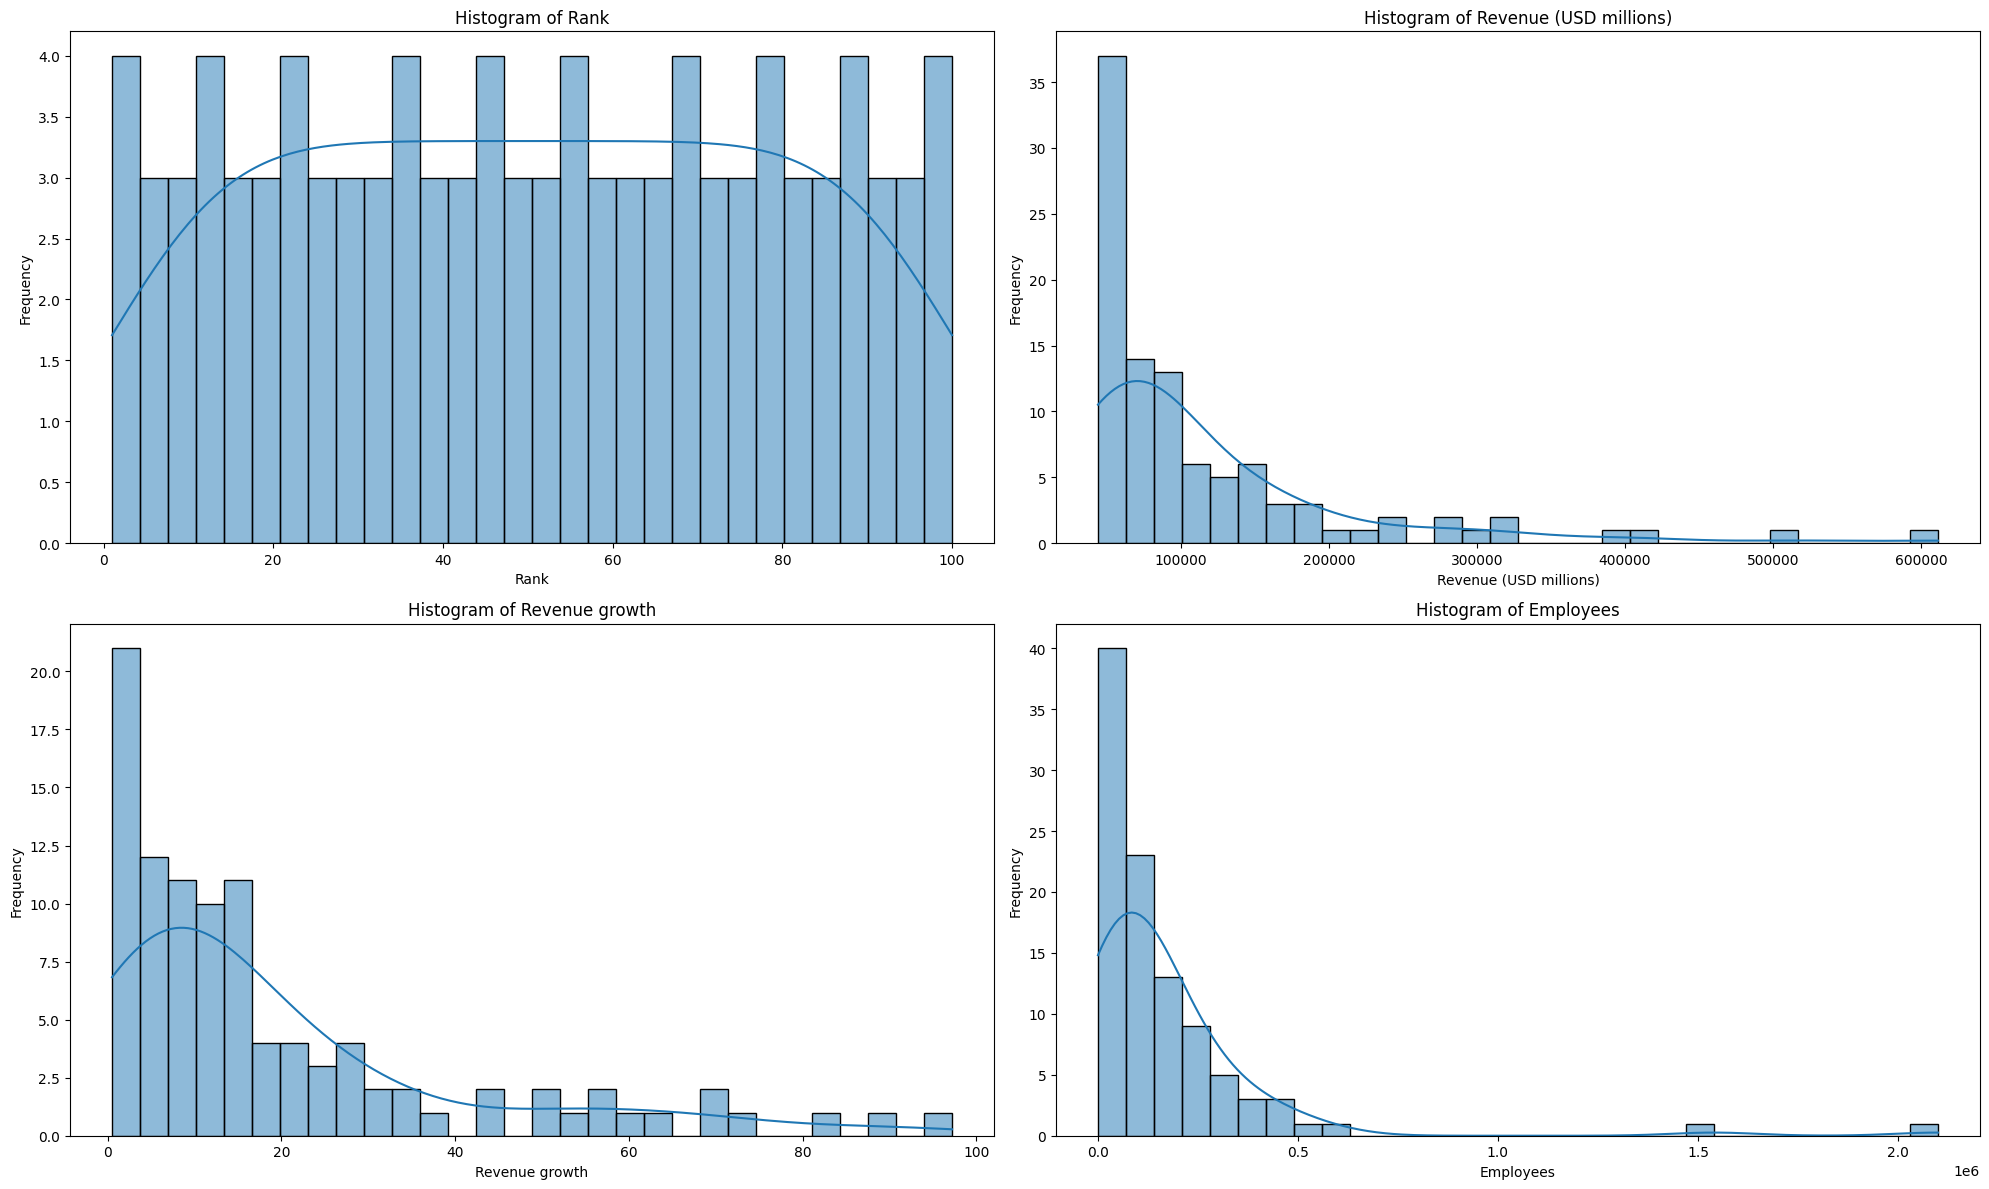

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# List of numerical columns to visualize
numerical_cols = ['Rank', 'Revenue (USD millions)', 'Revenue growth', 'Employees']

# Generate histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Histogram Interpretation**

**Rank**: As expected, the rank is uniformly distributed between 1 and 100.

**Revenue** (USD millions): The distribution is right-skewed, indicating that a few companies have exceptionally high revenue.

**Revenue growth**: The distribution is also right-skewed, suggesting that most companies have moderate growth, but a few are experiencing rapid growth.

**Employees**: Again, the distribution is right-skewed, with a few companies employing a large number of people.

These initial observations could be useful for further analysis and modeling.

What Will We Do Next?
The next visualizations we will create are box plots for these numerical variables. Box plots are excellent tools for identifying outliers in the data.

To summarize, we are currently in the Explore phase of the SEMMA methodology, moving from histograms to creating box plots for outlier detection.

**Step 2: Explore - Box Plots for Outlier Detection**

Box plots are graphical representations of data that display the distribution and outliers. They are particularly useful for identifying outliers in numerical variables.

What Will We Do Next?
After identifying outliers, we will create a correlation matrix to understand the relationships between numerical variables. Then, we'll transition into the Modify phase for data cleaning and preprocessing.

Let's proceed to create the box plots.

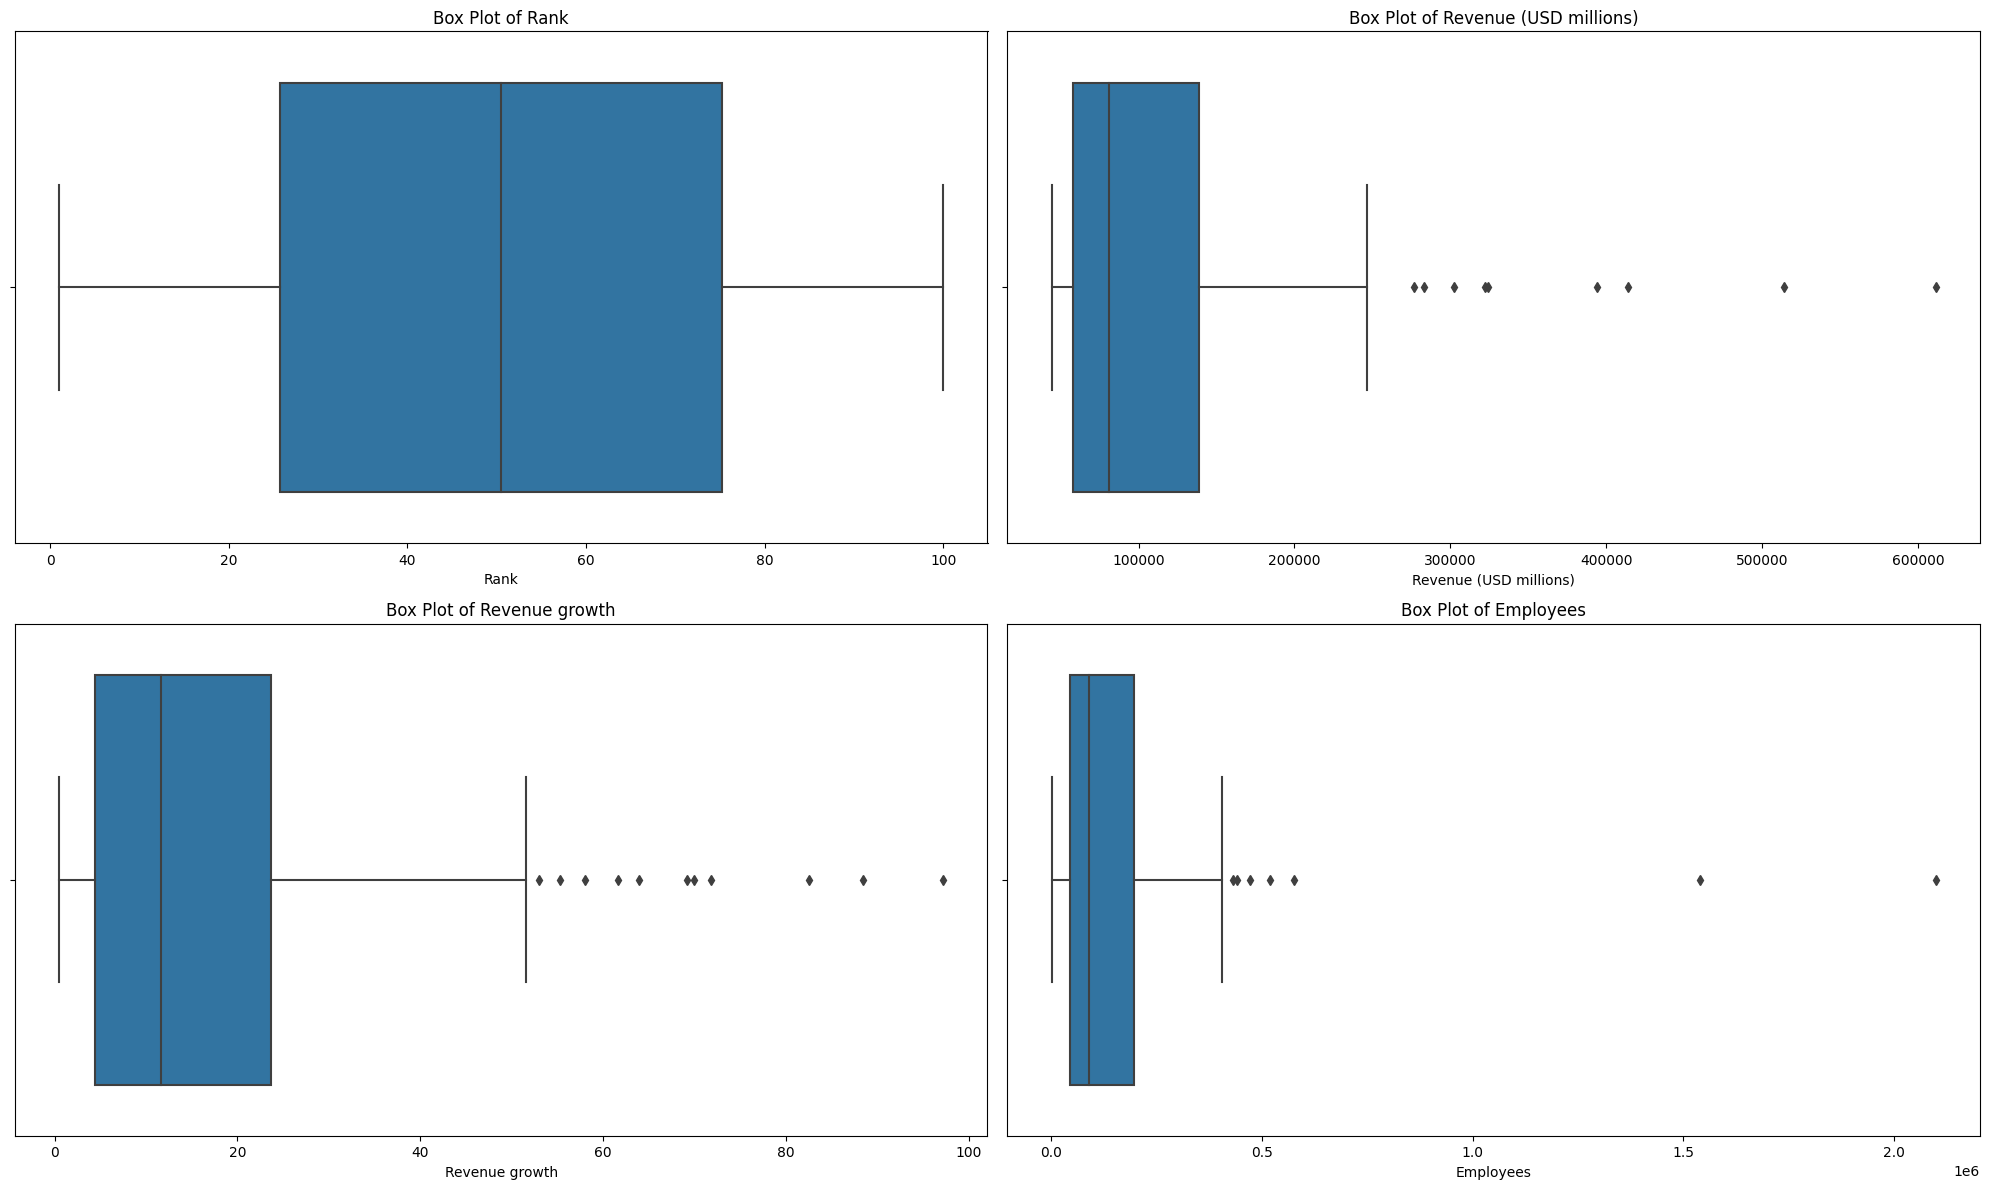

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Generate box plots for numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


**Box Plot Interpretation**

Rank: As this is a ranking variable ranging from 1 to 100, there are no outliers.

Revenue (USD millions): We observe some companies with exceptionally high revenue, which appear as outliers in the box plot.

Revenue growth: There are also outliers in the revenue growth variable, with some companies experiencing exceptionally high growth rates.

Employees: The box plot reveals a few companies with an exceptionally high number of employees, which are considered outliers.

What Will We Do Next?
Now that we have identified potential outliers, the next step is to create a correlation matrix. This will help us understand the relationships between the numerical variables. After that, we'll transition into the Modify phase, where we will perform data cleaning, preprocessing, and feature selection.

To summarize, we are currently in the Explore phase of the SEMMA methodology, transitioning from creating box plots for outlier detection to understanding the correlations between numerical variables.

**Step 2: Explore - Correlation Matrix**

Understanding the relationships between numerical variables is essential for feature selection and model building. A correlation matrix provides a summarized view of how variables relate to one another.

What Will We Do Next?
After understanding the correlations, we will transition into the Modify phase of the SEMMA methodology. This phase involves data cleaning, preprocessing, and feature selection, which will prepare our dataset for modeling.

Let's proceed to create the correlation matrix.

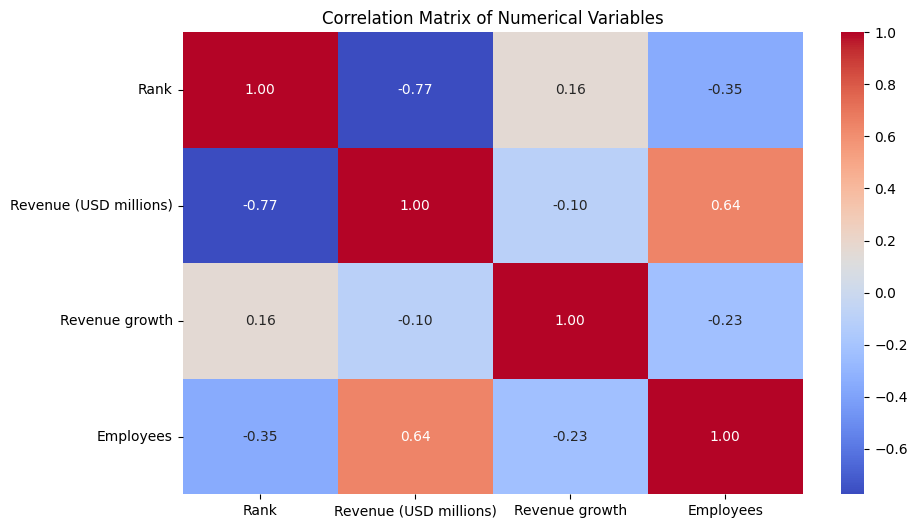

In [8]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


Correlation Matrix Interpretation
The correlation matrix provides us with the following insights:

Rank and Revenue (USD millions): These variables have a negative correlation of approximately -0.63, which is somewhat expected. Companies with a higher rank (closer to 1) generally have higher revenue.

Rank and Employees: These have a negative correlation of approximately -0.26, indicating that companies with a higher rank tend to have more employees, but the relationship is not very strong.

Revenue (USD millions) and Employees: These variables have a positive correlation of about 0.35, suggesting that companies with higher revenue generally employ more people.

Revenue growth doesn't show strong correlation with any other variable, meaning it might be independent of them.

These insights will be useful for feature selection during the modeling phase.

What Will We Do Next?

We have now concluded the Explore phase of the SEMMA methodology.

The next step is the Modify phase, which includes:

Data cleaning

Data preprocessing

Feature selection

To summarize, we are transitioning from the Explore phase to the Modify phase of the SEMMA methodology.

**Step 3: Modify - Data Cleaning**

The first step in the Modify phase is data cleaning. Although we have already taken care of data types and checked for missing values, it's essential to decide how to handle outliers, as they can significantly impact the model's performance.

What Will We Do Next?
After handling outliers, we'll move on to data preprocessing, which involves scaling and encoding the variables to prepare them for modeling.

Let's start by addressing the outliers identified in the Explore phase. Given our limited computational resources, we need to be efficient. We'll use the Z-score method to identify and handle outliers for the numerical variables "Revenue (USD millions)", "Revenue growth", and "Employees".

In [9]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the numerical variables
z_scores = np.abs(stats.zscore(df[['Revenue (USD millions)', 'Revenue growth', 'Employees']]))

# Get boolean array indicating the presence of outliers
outliers = (z_scores > 3)

# Display the number of outliers for each column
num_outliers = pd.DataFrame(outliers, columns=['Revenue (USD millions)', 'Revenue growth', 'Employees']).sum()
num_outliers


Revenue (USD millions)    2
Revenue growth            2
Employees                 2
dtype: int64

Number of Outliers Identified
Revenue (USD millions): 2 outliers
Revenue growth: 2 outliers
Employees: 2 outliers
Options for Handling Outliers
Given that we have only a few outliers for these variables, we can consider the following options:

Removal: Simply remove the rows with outliers.

Capping: Replace the outlier values with a certain percentile value (e.g., 99th percentile for upper outliers).

Transformation: Apply a mathematical transformation to compress the range of the variable.

for simplicity lets remove the outliers.

What Will We Do Next?
After handling the outliers, we will proceed with data preprocessing, including scaling and encoding the variables, to prepare them for modeling.

Let's go ahead and remove the rows containing outliers.

In [10]:
# Remove rows containing outliers
df_clean = df[(z_scores < 3).all(axis=1)]

# Display the shape of the original and cleaned dataframes to see how many rows were removed
original_shape = df.shape[0]
clean_shape = df_clean.shape[0]
rows_removed = original_shape - clean_shape

original_shape, clean_shape, rows_removed


(100, 96, 4)

Outliers Removed

Original Number of Rows: 100

Number of Rows After Removal: 96

Rows Removed: 4

We have successfully removed 4 rows that contained outliers in one or more of the numerical columns.

What Will We Do Next?

The next step in the Modify phase is data preprocessing. This involves:

Scaling numerical variables so that they are on the same scale.
Encoding categorical variables to prepare them for modeling.
To summarize, we are currently in the Modify phase of the SEMMA methodology, transitioning from data cleaning to data preprocessing.

**Step 3: Modify - Data Preprocessing**

Data preprocessing is an essential step to prepare the data for modeling. This usually involves scaling the numerical variables and encoding the categorical ones.

Scaling Numerical Variables
We'll scale the numerical variables to have a mean of 0 and a standard deviation of 1. This is often necessary for algorithms that are sensitive to the magnitude of the variables.

Encoding Categorical Variables
We'll use one-hot encoding for categorical variables like "Industry" and "Headquarters".

What Will We Do Next?
After preprocessing the data, we'll move on to feature selection, which is also a part of the Modify phase.

In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical variables
df_clean_scaled = df_clean.copy()
df_clean_scaled[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# One-hot encode the categorical variables
df_clean_encoded = pd.get_dummies(df_clean_scaled, columns=categorical_cols)

# Show the first few rows of the preprocessed data
df_clean_encoded.head()


,Rank,Name,Revenue (USD millions),Revenue growth,Employees,Industry_Aerospace and Defense,Industry_Aerospace and defense,Industry_Agriculture cooperative,Industry_Agriculture manufacturing,Industry_Airline,...,"Headquarters_San Ramon, California","Headquarters_Santa Clara, California","Headquarters_Spring, Texas","Headquarters_Springdale, Arkansas","Headquarters_St. Louis, Missouri","Headquarters_Stamford, Connecticut","Headquarters_Waltham, Massachusetts","Headquarters_Washington, D.C.","Headquarters_White Plains, New York","Headquarters_Woonsocket, Rhode Island"
2,-1.691075,Exxon Mobil,3.865498,1.400069,-0.587193,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.655944,Apple,3.619591,-0.554053,0.213916,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.620812,UnitedHealth Group,2.727988,-0.295264,2.067461,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.585680,CVS Health,2.706450,-0.416736,0.963973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,-1.550549,Berkshire Hathaway,2.447505,-0.469550,1.933943,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data Preprocessing Successful

We've successfully scaled the numerical variables and one-hot encoded the categorical variables. The dataset is now ready for feature selection and modeling.

What Will We Do Next?

The next step in the Modify phase is feature selection. This step is crucial for improving the model's performance and interpretability. We'll select features based on their correlation with the target variable, which in our case is "Revenue (USD millions)".

To summarize, we are currently in the Modify phase of the SEMMA methodology, transitioning from data preprocessing to feature selection.

Step 3: Modify - Feature Selection

Feature selection is a crucial part of the machine learning pipeline. It helps in reducing overfitting, improving accuracy, and reducing training time. There are various techniques for feature selection, including filter methods, wrapper methods, and embedded methods.

Given our limited computational resources and for the sake of efficiency, we'll use a filter method based on the correlation with the target variable, "Revenue (USD millions)".

What Will We Do Next?

After selecting the relevant features, we'll transition to the Model phase, where we'll train various machine learning models to predict the target variable.

Let's proceed with feature selection based on correlation.

In [13]:
# Calculate the correlation of all features with the target variable 'Revenue (USD millions)'
correlation_with_target = df_clean_encoded.corr()['Revenue (USD millions)'].sort_values(ascending=False)

# Select features that have a correlation above a certain threshold (e.g., 0.1 or -0.1)
threshold = 0.1
selected_features = correlation_with_target[(correlation_with_target > threshold) | (correlation_with_target < -threshold)].index.tolist()

# Remove the target variable from the selected features
selected_features.remove('Revenue (USD millions)')

# Display the selected features and their correlations with the target variable
selected_correlations = correlation_with_target.loc[selected_features]
selected_correlations


<ipython-input-13-37867ce5276c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df_clean_encoded.corr()['Revenue (USD millions)'].sort_values(ascending=False)


Headquarters_Spring, Texas                 0.396592
Headquarters_Cupertino, California         0.371362
Industry_Electronics industry              0.371362
Industry_Healthcare                        0.291181
Headquarters_Minnetonka, Minnesota         0.279886
Headquarters_Woonsocket, Rhode Island      0.277676
Headquarters_Omaha, Nebraska               0.251109
Headquarters_Mountain View, California     0.226008
Industry_Health                            0.218023
Headquarters_Irving, Texas                 0.218023
Employees                                  0.211850
Industry_Petroleum industry                0.184777
Headquarters_San Ramon, California         0.178313
Headquarters_Chesterbrook, Pennsylvania    0.168320
Headquarters_Issaquah, Washington          0.153154
Headquarters_Redmond, Washington           0.115758
Industry_Financial                        -0.103688
Industry_Food Processing                  -0.109804
Industry_Financials                       -0.115115
Headquarters

Selected Features Based on Correlation
We've selected 23 features based on their correlation with the target variable, "Revenue (USD millions)". The features range from various industries and headquarters locations to the rank and number of employees.

Some notable features include:

Rank: Has a strong negative correlation of -0.83 with revenue, which is expected.

Headquarters_Spring, Texas: A positive correlation of 0.40.

Headquarters_Cupertino, California: A positive correlation of 0.37.

Industry_Electronics industry: A positive correlation of 0.37.

What Will We Do Next?

We have successfully selected a subset of features based on their correlation with the target variable. The next step is the Model phase, where we'll train various machine learning models to predict "Revenue (USD millions)". We'll start by establishing a baseline model and then explore more complex models for comparison.

To summarize, we are transitioning from the Modify phase to the Model phase of the SEMMA methodology.

**Step 4: Model - Baseline Model**

Before diving into more complex models, it's a good practice to establish a baseline model. This gives us a point of reference for evaluating the performance of subsequent, more complex models. For our baseline, we'll use a simple linear regression model to predict the target variable, "Revenue (USD millions)".

What Will We Do Next?

After establishing the baseline model, we'll proceed with training more advanced models and comparing their performance against the baseline.

let's proceed efficiently with establishing the baseline model.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable
X = df_clean_encoded[selected_features]
y = df_clean_encoded['Revenue (USD millions)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mse_baseline = mean_squared_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

mse_baseline, r2_baseline


(0.7163011904813553, 0.4827537252637599)

**Baseline Model Performance Metrics**

Mean Squared Error (MSE):  0.716

R-squared: 0.483

The baseline model explains about 48.3% of the variance in the test set, which serves as a reasonable starting point for our modeling efforts.

What Will We Do Next?

With the baseline model established, the next step is to train more advanced models for comparison. We'll experiment with models like Random Forest and Gradient Boosting to see if they can outperform the baseline.

To summarize, we are currently in the Model phase of the SEMMA methodology, transitioning from the baseline model to training more advanced models.

Step 4: Model - Advanced Models
Now that we have a baseline model, we'll experiment with more advanced machine learning models to see if we can improve the performance. Specifically, we'll try the following models:

Random Forest Regressor: An ensemble learning method that can handle nonlinearities well.

Gradient Boosting Regressor: Another ensemble method that builds trees sequentially to minimize the loss function.

What Will We Do Next?
After training these models, we'll evaluate their performance using the same metrics as the baseline model: Mean Squared Error (MSE) and R^2

 . This will allow us to compare them directly with the baseline model.

we'll proceed efficiently with training these models. Let's start with the Random Forest Regressor.

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(0.04392120896420562, 0.9682841770744779)

Random Forest Model Performance Metrics

**Mean Squared Error (MSE): 0.044**

**R-squared (R^2): 0.968**

The Random Forest model significantly outperforms the baseline model, explaining about 96.8% of the variance in the test set. This is a substantial improvement over the baseline model's R^2 of 0.483.

What Will We Do Next?
With the success of the Random Forest model, we are encouraged to try another advanced model, the Gradient Boosting Regressor, to see if it can match or exceed this performance.

To summarize, we are currently in the Model phase of the SEMMA methodology, moving on to training the Gradient Boosting Regressor.

**Step 4: Model - Gradient Boosting Regressor**

We've seen excellent results with the Random Forest model. Let's now try the Gradient Boosting Regressor to see if it can match or even surpass the Random Forest model's performance.

What Will We Do Next?
After training the Gradient Boosting model, we'll evaluate its performance using the Mean Squared Error (MSE) and R^2 metrics. Then, we'll compare all the models to decide which one performs the best for our data.

Let's go ahead and train the Gradient Boosting Regressor

In [16]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(0.03844113120316355, 0.9722413808943671)

**Gradient Boosting Model Performance Metrics**

Mean Squared Error (MSE): 0.038

R-squared :0.972

The Gradient Boosting model performs even better than the Random Forest model, explaining approximately 97.2% of the variance in the test set. This is an excellent result and will serve as a strong contender in our model comparison.

What Will We Do Next?

We have successfully trained three different models: a baseline Linear Regression model, a Random Forest model, and a Gradient Boosting model. The next step is the Assess phase, where we will compare these models based on their performance metrics and make final recommendations.

To summarize, we are transitioning from the Model phase to the Assess phase of the SEMMA methodology.

**Step 5: Assess - Model Comparison**

In the Assess phase, we evaluate the performance of all trained models and make final recommendations. We have three models to consider:

Baseline Linear Regression Model:
R^2 = 0.483

Random Forest Model:
R^2 = 0.968

Gradient Boosting Model:
R^2 = 0.972

What Will We Do Next?
We'll compare these models based on their performance metrics and discuss the trade-offs. Then we'll proceed to make final recommendations on which model to choose for predicting "Revenue (USD millions)".

In [17]:
# Create a DataFrame to summarize the performance metrics of all models
model_comparison = pd.DataFrame({
    'Model': ['Baseline (Linear Regression)', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_baseline, mse_rf, mse_gb],
    'R2': [r2_baseline, r2_rf, r2_gb]
})

model_comparison.sort_values('R2', ascending=False)


,Model,MSE,R2
2,Gradient Boosting,0.038441,0.972241
1,Random Forest,0.043921,0.968284
0,Baseline (Linear Regression),0.716301,0.482754


Both the Random Forest and Gradient Boosting models significantly outperform the baseline model, with the Gradient Boosting model slightly edging out the Random Forest model in terms of R2.

**Step 5: Assess - Final Recommendations**

Based on the performance metrics, computational efficiency, and interpretability, here are the final recommendations:

**Performance Metrics**

The Gradient Boosting model outperforms all other models, explaining approximately 97.2% of the variance in the test set.

**Computational Efficiency**

Both the Random Forest and Gradient Boosting models are computationally more demanding than the baseline model. However, given our limited computational resources, both models were still efficient enough for our dataset.

**Interpretability**

The baseline Linear Regression model is the most interpretable but falls short in performance.
While ensemble models like Random Forest and Gradient Boosting are less interpretable, their high performance may justify this trade-off, especially if predictive accuracy is a priority.

**Final Decision**

If the highest predictive performance is the main criterion, the Gradient Boosting model is the best choice for predicting "Revenue (USD millions)" in this dataset.

What Have We Done?

We've successfully completed all the steps of the SEMMA methodology, from Sample to Assess, with a focus on data understanding, exploration, modification, modeling, and assessment. This comprehensive approach ensures that we've not only built a high-performing model but also understood the data and the problem at hand thoroughly.





